In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import scipy.io as sio
from mpl_toolkits.basemap import Basemap, cm

/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# import location data for cruise track and stations
cfname = '/Volumes/sclayton/kuroshio/AVHRR_9km/xbt_ctd_coords.mat'
coords = sio.loadmat(cfname)

botlat = coords['bot_lat']
botlon = coords['bot_lon']
xbtlon = coords['xbt_lon'].transpose()
xbtlat = coords['xbt_lat'].transpose()

# import the NOAA SST data
cfname = '/Volumes/sclayton/kuroshio/satellite/20091018-mcsstd.mat'
sst = sio.loadmat(cfname)
# create a masked array where missing data is set as "bad"
bad = (sst['sst']==5)
temp = np.ma.masked_where(bad, sst['sst'])


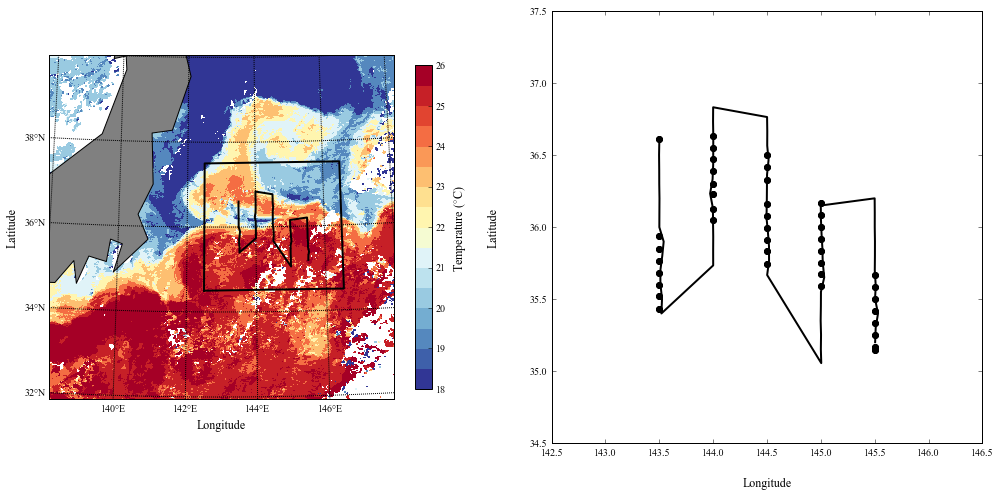

In [7]:
# make a plot of the data
from mpl_toolkits.axes_grid.inset_locator import inset_axes
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})

palette = plt.get_cmap('RdYlBu_r',16)

fig1 = plt.figure(1, figsize=(14, 7), dpi = 600)

# larger scale map

ax1 = fig1.add_subplot(122)
m = Basemap(width=900000,height=900000,projection='lcc',
            resolution='c',lat_1=32,lat_2=42,lat_0=36,lon_0=143)

m.drawcoastlines()
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='grey',lake_color='white')

m.pcolormesh(sst['loni'], sst['lati'], temp,shading = 'flat', cmap=palette, latlon=True, vmin= 18, vmax = 26)
m.plot(xbtlon,xbtlat, 'k',linewidth=2, latlon=True)
m.plot([142.5, 146.5, 146.5, 142.5, 142.5],[34.5, 34.5, 37.5, 37.5, 34.5], 'k', linewidth=2,  latlon=True)

m.drawparallels(np.arange(30,50,2),labels=[1,0,0,0])
m.drawmeridians(np.arange(138,153,2),labels=[0,0,0,1])

cb = plt.colorbar(shrink=.75)
cb.set_label(label=r'Temperature ($^{\circ}$C)',fontsize=12)


ax2 = fig1.add_subplot(121)

ax2.plot(botlon,botlat, 'ok')
ax2.plot(xbtlon,xbtlat, 'k',linewidth=2)

ax2.set_xlim([142.5, 146.5])
ax2.set_ylim([34.5, 37.5])

ax1.set_xlabel(r'Longitude', fontsize=12, labelpad=20)
ax1.set_ylabel(r'Latitude', fontsize=12, labelpad=30)

ax2.set_xlabel(r'Longitude', fontsize=12, labelpad=20)
ax2.set_ylabel(r'Latitude', fontsize=12, labelpad=30)

plt.tick_params(axis='left', which='major', labelsize=12, pad = 20)


plt.show()
#fig1.savefig('/Users/sclayton/Desktop/LO_fig1_R1.tiff', format='tiff', dpi=600)